<a href="https://colab.research.google.com/github/shitodcy/tugas-AI-face-recognition/blob/main/Tugas_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
print("upload file json")
files.upload()

upload file json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"eleinalzrs","key":"ff7a1984af29ffeff656b50123a7db25"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
print("\nMengunduh dataset...")
!kaggle datasets download -d cashutosh/gender-classification-dataset
!unzip -q gender-classification-dataset.zip
print("Dataset siap digunakan.")


Mengunduh dataset...
Dataset URL: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
License(s): other
gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
n
Dataset siap digunakan.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Direktori data
train_dir = 'Training'
validation_dir = 'Validation'

# Membuat generator data untuk memuat dan memproses gambar secara otomatis
# Ini akan melakukan normalisasi (rescale=1./255) dan augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalisasi piksel
    rotation_range=20,   # Augmentasi: memutar gambar
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255) # Cukup normalisasi untuk data validasi

# Menyiapkan batch data dari direktori
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(96, 96),
    batch_size=128,
    class_mode='binary'
)

# Melihat kelas yang ditemukan
print("Kelas yang ditemukan:", train_generator.class_indices)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Kelas yang ditemukan: {'female': 0, 'male': 1}


In [ ]:
model = Sequential([
    # Input shape disesuaikan dengan target_size
    Conv2D(16, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # (Satu blok Conv2D dihilangkan untuk kecepatan)

    Flatten(),
    Dense(128, activation='relu'), # Neuron Dense dikurangi
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 94, 94, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 47, 47, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,987,809 (7.58 MB)

 Trainable params: 1,987,809 (7.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Latih model menggunakan generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Jumlah batch per epoch
    epochs=30,  # Anda bisa menambah epoch untuk akurasi lebih baik
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32 # Jumlah batch validasi
)

Epoch 1/30
 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:24 350ms/step - accuracy: 0.6737 - loss: 0.6094

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.7215 - loss: 0.5512 - val_accuracy: 0.8622 - val_loss: 0.3533
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:24 349ms/step - accuracy: 0.8150 - loss: 0.4197

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 135s 92ms/step - accuracy: 0.8238 - loss: 0.4016 - val_accuracy: 0.8949 - val_loss: 0.2662
Epoch 3/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:28 353ms/step - accuracy: 0.8485 - loss: 0.3490

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 142s 92ms/step - accuracy: 0.8558 - loss: 0.3376 - val_accuracy: 0.9141 - val_loss: 0.2147
Epoch 4/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:33 358ms/step - accuracy: 0.8787 - loss: 0.2936

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 144s 93ms/step - accuracy: 0.8799 - loss: 0.2906 - val_accuracy: 0.9209 - val_loss: 0.2026
Epoch 5/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:32 356ms/step - accuracy: 0.8925 - loss: 0.2659

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 137s 93ms/step - accuracy: 0.8929 - loss: 0.2636 - val_accuracy: 0.9372 - val_loss: 0.1666
Epoch 6/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:29 354ms/step - accuracy: 0.9021 - loss: 0.2454

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 136s 92ms/step - accuracy: 0.9018 - loss: 0.2450 - val_accuracy: 0.9400 - val_loss: 0.1659
Epoch 7/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:36 360ms/step - accuracy: 0.9077 - loss: 0.2316

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 145s 94ms/step - accuracy: 0.9083 - loss: 0.2302 - val_accuracy: 0.9408 - val_loss: 0.1574
Epoch 8/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:38 362ms/step - accuracy: 0.9144 - loss: 0.2188

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 147s 97ms/step - accuracy: 0.9150 - loss: 0.2188 - val_accuracy: 0.9443 - val_loss: 0.1506
Epoch 9/30
 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:40 364ms/step - accuracy: 0.9174 - loss: 0.2117

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 198s 95ms/step - accuracy: 0.9175 - loss: 0.2104 - val_accuracy: 0.9457 - val_loss: 0.1522
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:32 356ms/step - accuracy: 0.9202 - loss: 0.2080

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 137s 93ms/step - accuracy: 0.9208 - loss: 0.2037 - val_accuracy: 0.9462 - val_loss: 0.1522
Epoch 11/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:33 357ms/step - accuracy: 0.9257 - loss: 0.1919

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 138s 93ms/step - accuracy: 0.9232 - loss: 0.1953 - val_accuracy: 0.9503 - val_loss: 0.1367
Epoch 12/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:32 357ms/step - accuracy: 0.9278 - loss: 0.1863

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.9272 - loss: 0.1875 - val_accuracy: 0.9526 - val_loss: 0.1343
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:30 355ms/step - accuracy: 0.9304 - loss: 0.1805

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 136s 92ms/step - accuracy: 0.9306 - loss: 0.1815 - val_accuracy: 0.9506 - val_loss: 0.1323
Epoch 14/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:27 352ms/step - accuracy: 0.9282 - loss: 0.1854

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 141s 92ms/step - accuracy: 0.9293 - loss: 0.1822 - val_accuracy: 0.9448 - val_loss: 0.1435
Epoch 15/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:27 352ms/step - accuracy: 0.9328 - loss: 0.1768

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 136s 92ms/step - accuracy: 0.9326 - loss: 0.1769 - val_accuracy: 0.9448 - val_loss: 0.1536
Epoch 16/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:28 353ms/step - accuracy: 0.9346 - loss: 0.1714

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 142s 92ms/step - accuracy: 0.9339 - loss: 0.1719 - val_accuracy: 0.9526 - val_loss: 0.1271
Epoch 17/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:26 351ms/step - accuracy: 0.9360 - loss: 0.1696

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 135s 91ms/step - accuracy: 0.9359 - loss: 0.1689 - val_accuracy: 0.9567 - val_loss: 0.1218
Epoch 18/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:28 353ms/step - accuracy: 0.9378 - loss: 0.1634

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 140s 95ms/step - accuracy: 0.9367 - loss: 0.1666 - val_accuracy: 0.9572 - val_loss: 0.1232
Epoch 19/30
 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:26 351ms/step - accuracy: 0.9380 - loss: 0.1672

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 137s 92ms/step - accuracy: 0.9386 - loss: 0.1662 - val_accuracy: 0.9556 - val_loss: 0.1203
Epoch 20/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:30 354ms/step - accuracy: 0.9403 - loss: 0.1623

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 137s 93ms/step - accuracy: 0.9398 - loss: 0.1623 - val_accuracy: 0.9538 - val_loss: 0.1258
Epoch 21/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:31 356ms/step - accuracy: 0.9410 - loss: 0.1575

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 137s 93ms/step - accuracy: 0.9411 - loss: 0.1584 - val_accuracy: 0.9524 - val_loss: 0.1251
Epoch 22/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:29 354ms/step - accuracy: 0.9430 - loss: 0.1541

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 136s 93ms/step - accuracy: 0.9410 - loss: 0.1578 - val_accuracy: 0.9553 - val_loss: 0.1211
Epoch 23/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:34 358ms/step - accuracy: 0.9419 - loss: 0.1566

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 148s 96ms/step - accuracy: 0.9414 - loss: 0.1577 - val_accuracy: 0.9583 - val_loss: 0.1118
Epoch 24/30
 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:44 367ms/step - accuracy: 0.9412 - loss: 0.1583

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 201s 96ms/step - accuracy: 0.9412 - loss: 0.1582 - val_accuracy: 0.9579 - val_loss: 0.1202
Epoch 25/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:37 361ms/step - accuracy: 0.9399 - loss: 0.1587

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 140s 95ms/step - accuracy: 0.9399 - loss: 0.1576 - val_accuracy: 0.9551 - val_loss: 0.1195
Epoch 26/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:38 362ms/step - accuracy: 0.9428 - loss: 0.1520

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 142s 95ms/step - accuracy: 0.9427 - loss: 0.1521 - val_accuracy: 0.9598 - val_loss: 0.1128
Epoch 27/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:51 373ms/step - accuracy: 0.9430 - loss: 0.1476

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 148s 100ms/step - accuracy: 0.9427 - loss: 0.1498 - val_accuracy: 0.9585 - val_loss: 0.1143
Epoch 28/30
 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:51 374ms/step - accuracy: 0.9438 - loss: 0.1485

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 144s 98ms/step - accuracy: 0.9442 - loss: 0.1482 - val_accuracy: 0.9583 - val_loss: 0.1126
Epoch 29/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:39 363ms/step - accuracy: 0.9449 - loss: 0.1464

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 139s 94ms/step - accuracy: 0.9443 - loss: 0.1477 - val_accuracy: 0.9574 - val_loss: 0.1218
Epoch 30/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 368/1469 ━━━━━━━━━━━━━━━━━━━━ 6:50 373ms/step - accuracy: 0.9445 - loss: 0.1528

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 147s 100ms/step - accuracy: 0.9450 - loss: 0.1494 - val_accuracy: 0.9590 - val_loss: 0.1189


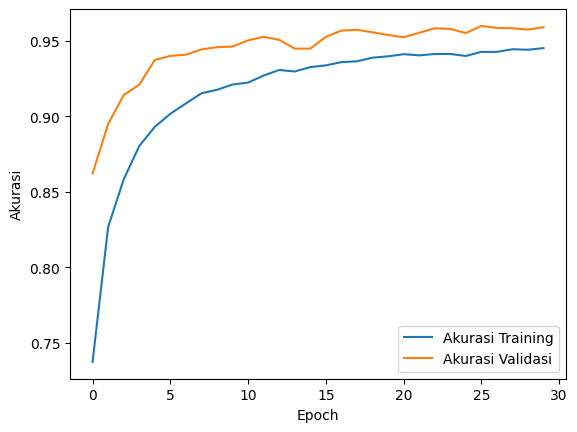

Saving jihan.jpg to jihan (5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

File: jihan (5).jpg
Hasil Prediksi: [0.11758049]
Prediksi: Perempuan (Female)


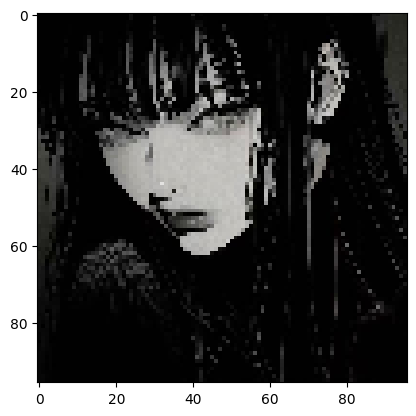

In [44]:
# Plot akurasi training & validasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# --- Contoh untuk memprediksi gambar baru ---
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload gambar wajah yang ingin Anda tes
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  # Load the image with the same target size as the training data
  img = image.load_img(path, target_size=(96, 96))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  print(f"\nFile: {fn}")
  print(f"Hasil Prediksi: {classes[0]}")

  if classes[0] > 0.5:
    print("Prediksi: Laki-laki (Male)")
  else:
    print("Prediksi: Perempuan (Female)")